In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Loading**

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/fraud_detection.zip'
extract_to_path = '/content/extracted'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")


Extraction complete.


In [ ]:
import pandas as pd
df=pd.read_csv("/content/extracted/creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **Exploratory Data Analysis**

In [ ]:
null_values = df.isnull().sum()

print("Null Values:")
print(null_values)

Null Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
summary_stats


Summary Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


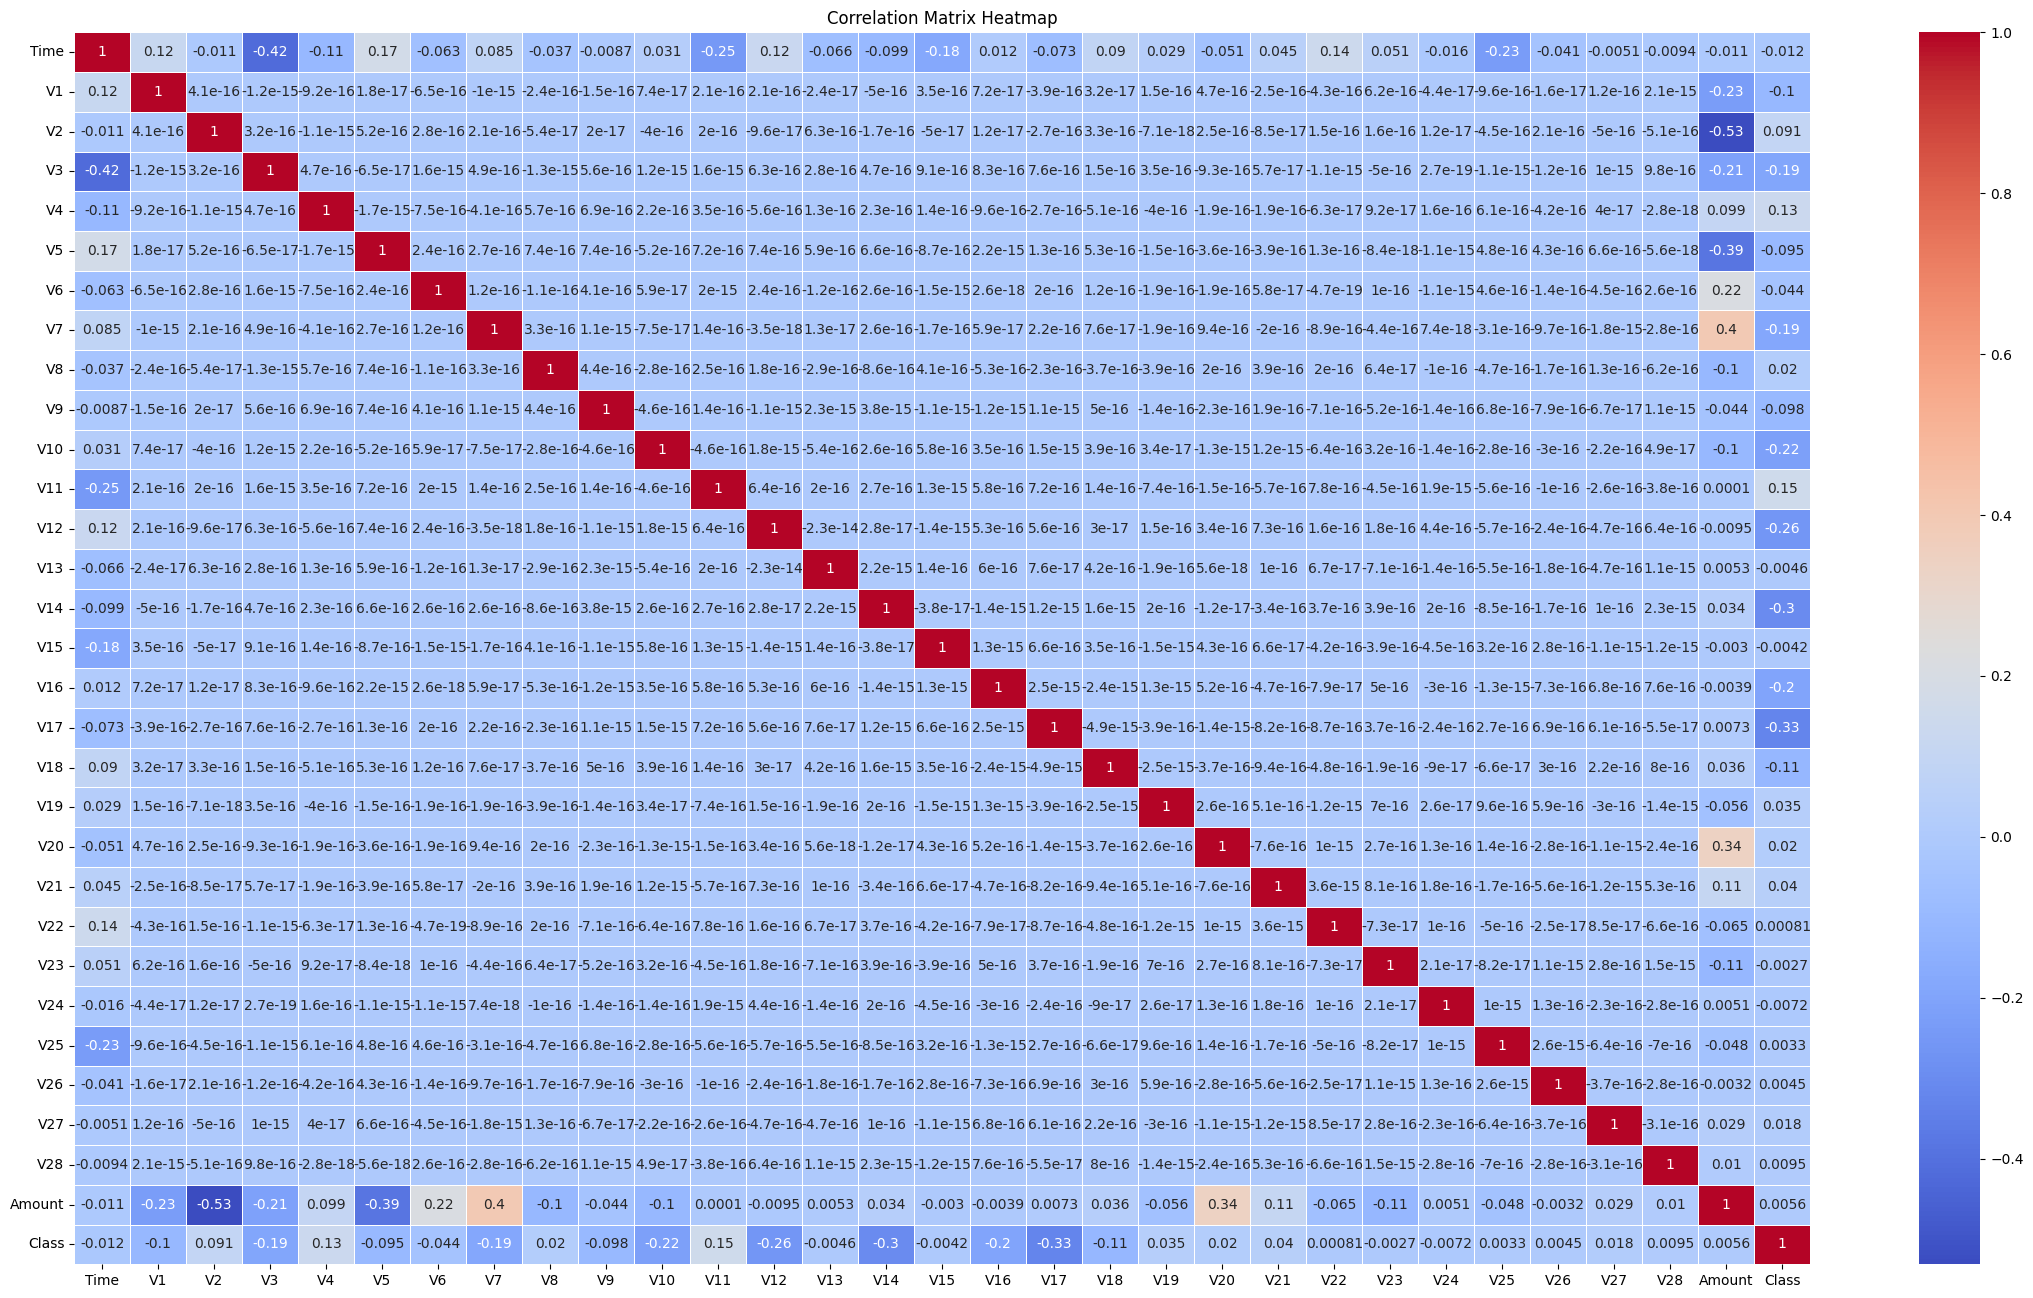

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(28, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

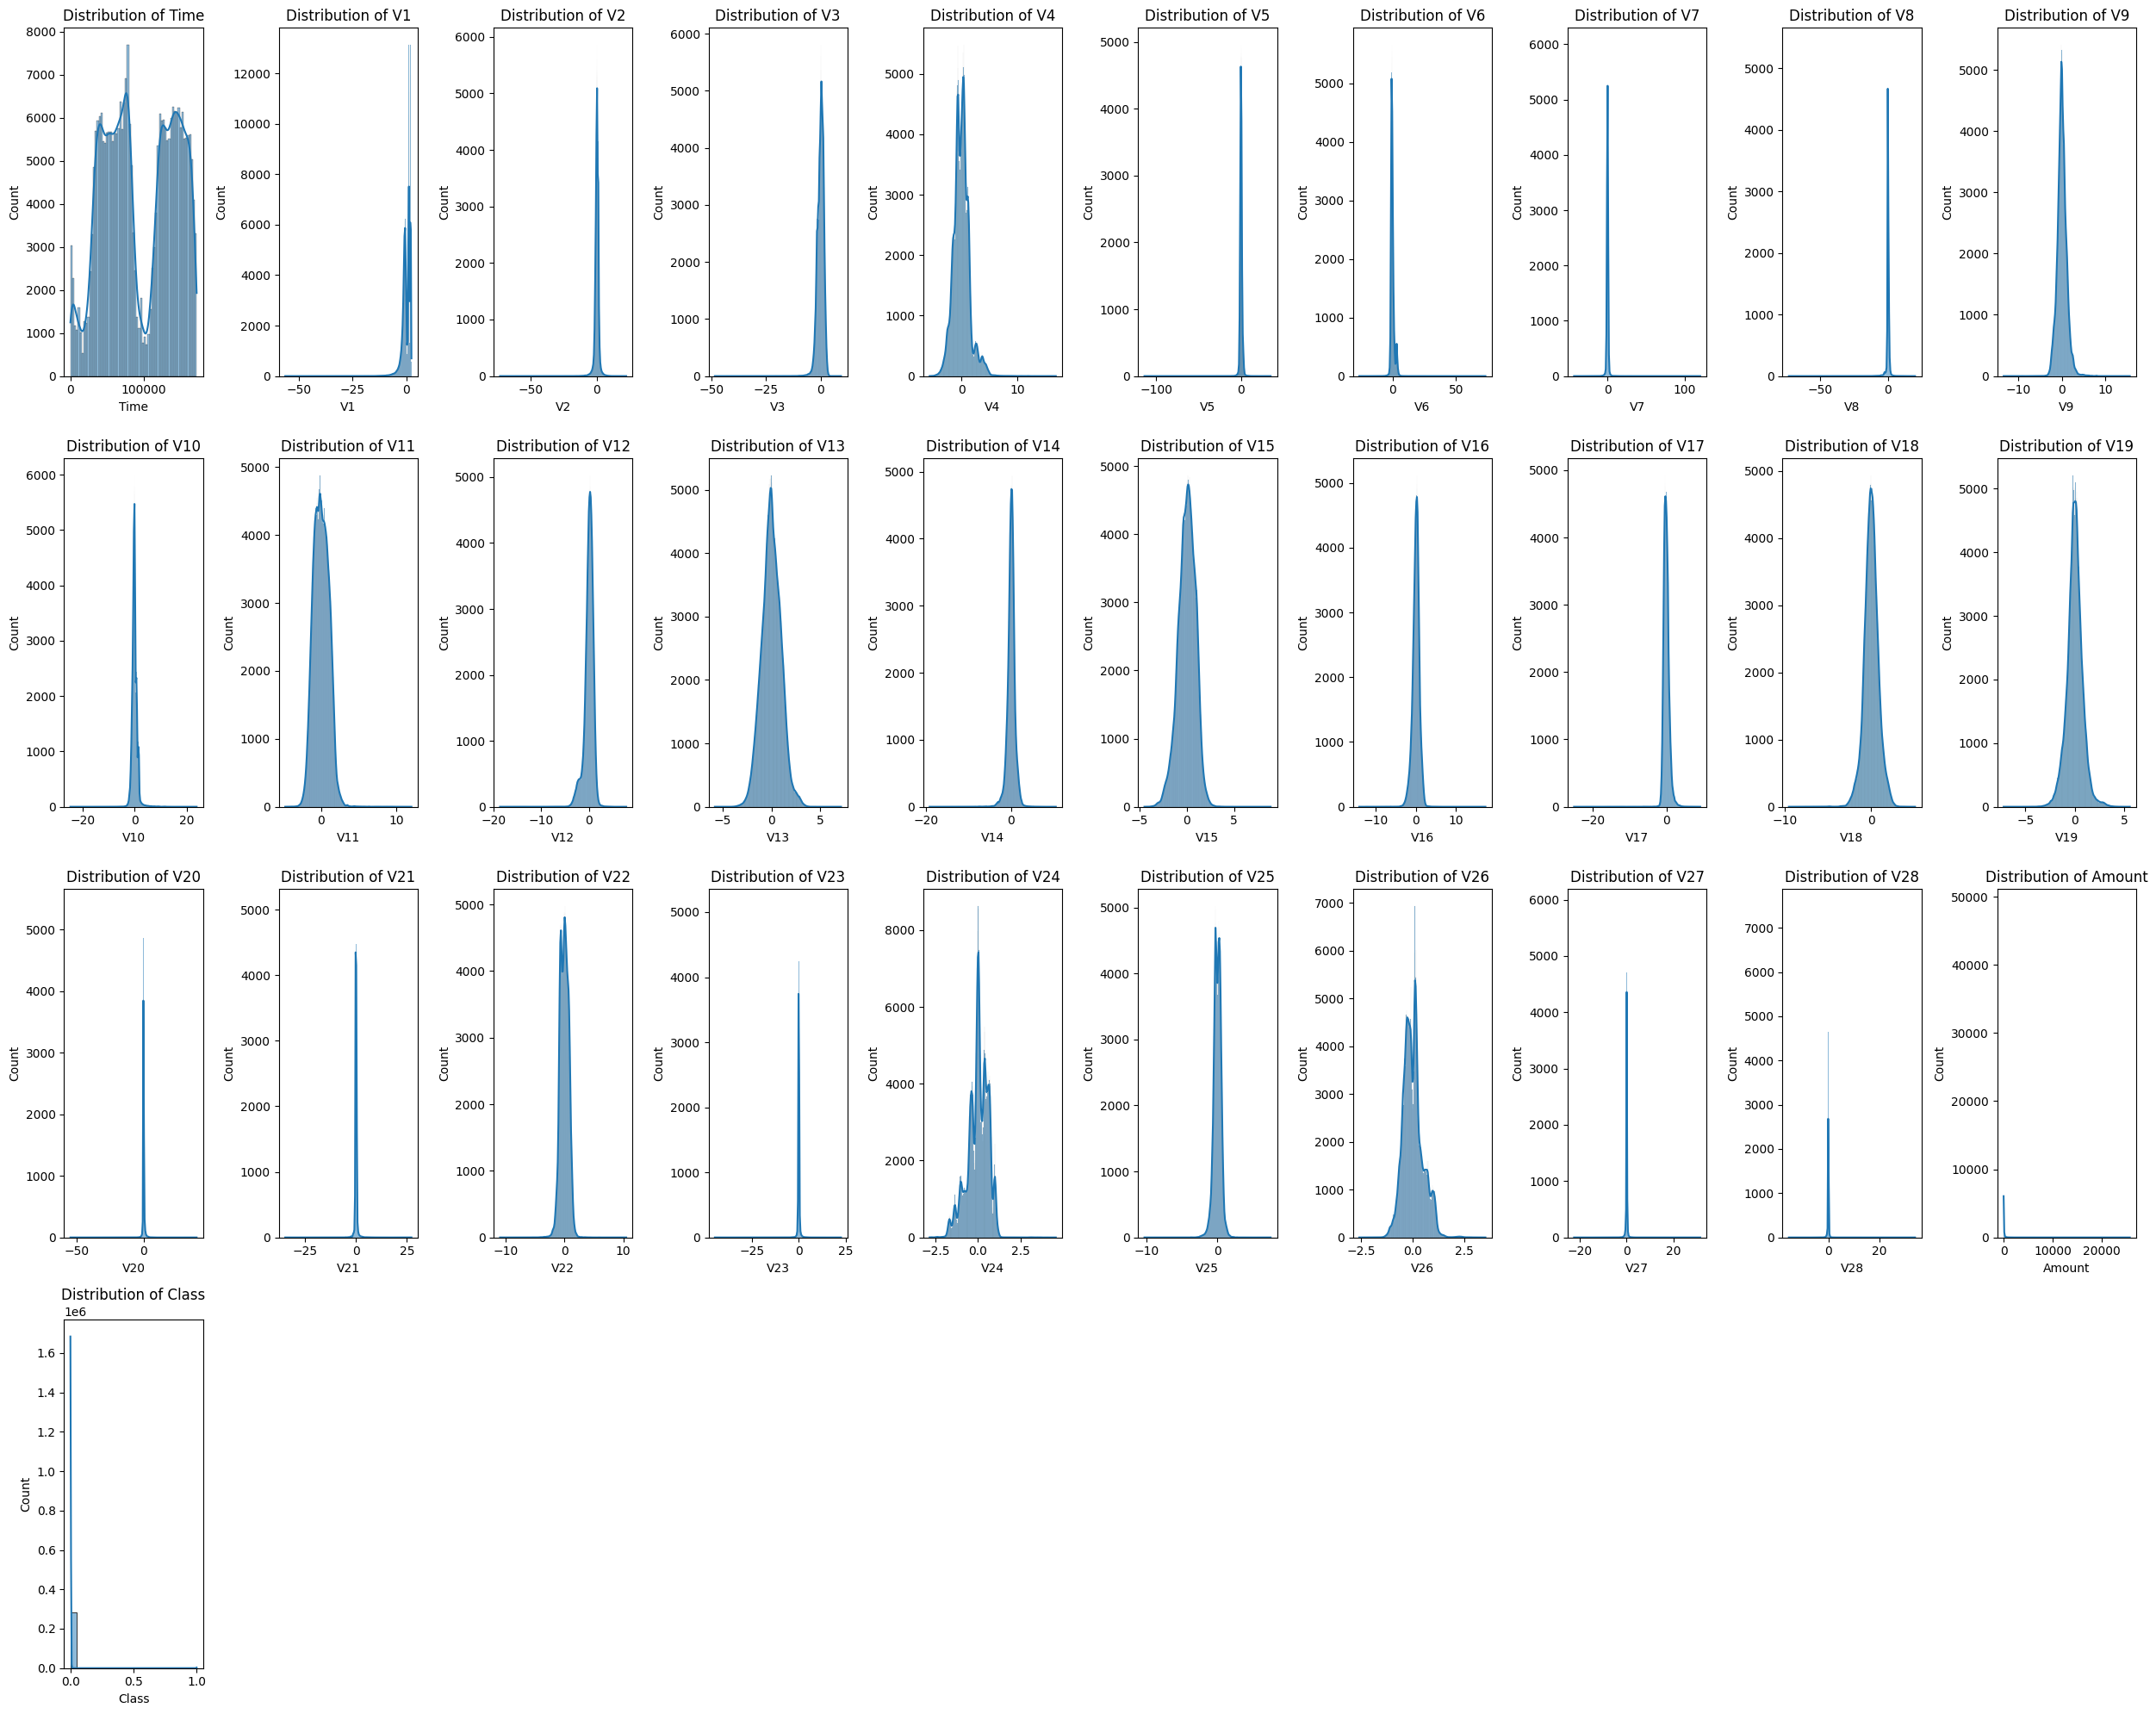

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_features)
num_cols = 10  # Number of columns for subplots
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot distribution for each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


# **Initializing the Global Model**

In [ ]:
import tensorflow as tf

# Define the architecture of the global model
def create_global_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Initialize the global model
def initialize_global_model(input_shape):
    global_model = create_global_model(input_shape)
    global_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])
    return global_model

# Define input shape based on the number of features in your dataset
input_shape = (30,)  # Assuming you have 30 features in your dataset

# Initialize the global model
global_model = initialize_global_model(input_shape)

# Print model summary
global_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Loading Client data**

In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataset is already loaded into a DataFrame called 'df'

# Define the number of clients
num_clients = 3

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Calculate the number of rows per client
rows_per_client = len(df) // num_clients

# Create a list to hold dataframes for each client
client_dfs = []

# Distribute the data among clients
for i in range(num_clients):
    start_index = i * rows_per_client
    end_index = (i + 1) * rows_per_client if i < num_clients - 1 else len(df)
    client_df = df.iloc[start_index:end_index]
    client_dfs.append(client_df)

# Example output: print the number of rows for each client
for i, client_df in enumerate(client_dfs):
    print(f"Client {i+1} has {len(client_df)} rows.")


Client 1 has 94935 rows.
Client 2 has 94935 rows.
Client 3 has 94937 rows.


In [ ]:
from IPython.display import display

# Display client data as DataFrame
for i, client_df in enumerate(client_dfs):
    print(f"Client {i+1} Data:")
    display(client_df.head())


Client 1 Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,118820.0,0.230713,-0.698271,0.942302,-2.747797,-1.060577,0.019155,0.014922,-0.275142,-1.995122,...,-0.263083,-0.261171,0.186812,-0.456913,-0.898322,-0.587199,-0.144409,-0.200676,107.00,0
1,164990.0,-0.089984,1.443859,2.043876,4.486933,-0.009906,0.841385,0.038763,0.189302,-1.488197,...,0.297649,1.222902,-0.170789,0.094594,-0.636894,0.496406,0.506863,0.271634,3.28,0
2,65184.0,-3.760743,3.033427,-0.807428,1.137522,-1.642560,1.570351,-2.241837,3.200501,0.195486,...,-0.297501,-0.707874,0.031070,-1.328928,0.526416,-0.273190,0.224071,0.075731,2.15,0
3,79798.0,-0.550762,-1.007240,1.289291,-2.138844,-0.404873,-1.133341,-0.363311,-0.103656,-2.410220,...,0.072084,0.368635,0.323653,0.387078,-0.738993,-0.468423,0.174193,0.204710,57.50,0
4,163958.0,-0.637140,0.272942,1.516366,-0.189774,0.169408,-0.526155,0.061146,0.093055,0.583241,...,0.340665,1.227074,-0.180615,0.039575,-0.194528,-0.104700,0.444972,0.249978,14.75,0


Client 2 Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94935,963.0,-0.648844,1.172894,0.940058,-0.487177,0.726667,0.356874,0.329655,-0.670178,-0.635306,...,0.504407,-0.916087,-0.111763,-1.035125,0.009053,0.141971,0.311876,0.102662,4.49,0
94936,66906.0,1.090466,0.230078,1.516375,2.721713,-0.777781,0.167893,-0.504390,0.136316,0.044531,...,-0.070428,-0.069687,0.024561,0.399544,0.305211,-0.047026,0.042166,0.039895,18.67,0
94937,40771.0,1.341722,-0.891232,0.985700,-0.455161,-1.542287,-0.115774,-1.157555,0.113554,0.135501,...,-0.517532,-0.889652,0.085137,-0.109921,0.039151,0.993234,-0.013671,0.016326,16.40,0
94938,121452.0,2.153190,0.061819,-2.207746,0.242861,0.749044,-1.012372,0.625138,-0.424551,0.227314,...,0.067888,0.355816,-0.027514,0.546555,0.425677,0.697564,-0.120534,-0.082078,0.76,0
94939,71379.0,-0.725394,0.483913,2.480248,0.245903,-1.071888,0.631173,-0.649378,0.295044,-0.663856,...,-0.060873,0.795081,-0.028756,0.175565,-0.677572,-0.185916,0.561143,0.151099,5.00,0


Client 3 Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
189870,82958.0,0.633626,-1.224333,0.196975,-0.668548,-0.935054,-0.125194,-0.041041,0.043873,1.235307,...,0.251832,0.348324,-0.340062,0.078831,0.482546,-0.645523,0.033639,0.063390,287.52,0
189871,89115.0,2.062238,-0.089802,-1.072244,0.423714,-0.198958,-1.232913,0.145347,-0.302902,0.627763,...,-0.295577,-0.744121,0.348642,0.030592,-0.318781,0.197357,-0.074373,-0.061165,1.29,0
189872,120714.0,-3.701591,-5.323599,-0.632749,1.005314,0.460391,-0.230250,1.832630,0.011560,0.666912,...,1.115198,0.995625,2.467435,0.556178,0.865824,-0.027342,-0.354617,0.180006,981.04,0
189873,53137.0,-1.372271,1.352782,-0.463742,-0.157985,-0.509244,-0.754572,0.771827,0.295978,-1.003331,...,0.116457,0.219729,-0.064577,-0.018919,-0.261678,1.070132,-0.488180,-0.043151,119.00,0
189874,115917.0,2.091360,0.473936,-2.970920,0.300085,1.339451,-0.458983,0.167274,-0.077797,0.366721,...,0.068129,0.311203,-0.152848,-0.576408,0.377820,-0.086195,0.007443,-0.007031,1.00,0


# **Training Client Models for Collaborative Training**

## **Training of client 1 by Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your dataset has features and labels
# X contains features, y contains labels
X = client_dfs[0].drop(columns=['Class'])
y = client_dfs[0]['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.9993679886237953


## **Training of client 2 by ANN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your dataset has features and labels
# X contains features, y contains labels
X = client_dfs[1].drop(columns=['Class'])
y = client_dfs[1]['Class']

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
2374/2374 [==============================] - 7s 3ms/step - loss: 9.4034 - accuracy: 0.9966 - val_loss: 6.3383 - val_accuracy: 0.9979
Epoch 2/10
2374/2374 [==============================] - 6s 3ms/step - loss: 4.2489 - accuracy: 0.9965 - val_loss: 8.0977 - val_accuracy: 0.9979
Epoch 3/10
2374/2374 [==============================] - 7s 3ms/step - loss: 2.5689 - accuracy: 0.9965 - val_loss: 2.2514 - val_accuracy: 0.9979
Epoch 4/10
2374/2374 [==============================] - 7s 3ms/step - loss: 1.2667 - accuracy: 0.9971 - val_loss: 0.0592 - val_accuracy: 0.9978
Epoch 5/10
2374/2374 [==============================] - 6s 2ms/step - loss: 1.9246 - accuracy: 0.9962 - val_loss: 0.4350 - val_accuracy: 0.9980
Epoch 6/10
2374/2374 [==============================] - 7s 3ms/step - loss: 0.6445 - accuracy: 0.9968 - val_loss: 0.6579 - val_accuracy: 0.9979
Epoch 7/10
2374/2374 [==============================] - 6s 2ms/step - loss: 1.1804 - accuracy: 0.9957 - val_loss: 3.0047 - val_accuracy:

## **Training of client 3 by MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your dataset has features and labels
# X contains features, y contains labels
X = client_dfs[2].drop(columns=['Class'])
y = client_dfs[2]['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier()

# Train the classifier
mlp_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("MLP Accuracy:", accuracy)


MLP Accuracy: 0.9981040657257215


## **Itrative Training**

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Define the parameters for the TensorFlow model
input_shape = (30,)  # Assuming input shape based on the number of features

# Create a function to define the architecture of the client model
def create_client_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create a list to hold trained models for each client
client_models = []

# Local training for each client
for i, client_df in enumerate(client_dfs):
    # Separate features and target variable
    X = client_df.drop(columns=['Class'])
    y = client_df['Class']

    # Initialize and train the client model
    client_model = create_client_model()
    client_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

    # Train the model
    client_model.fit(X, y, epochs=10, batch_size=32)  # Adjust epochs and batch_size as needed

    # Append the trained model to the list
    client_models.append(client_model)

    # Evaluate the model
    y_pred_prob = client_model.predict(X)  # Get predicted probabilities
    y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get classes
    accuracy = accuracy_score(y, y_pred)

    # Print evaluation metrics
    print(f"Client {i+1}: Accuracy - {accuracy:.4f}")

# You may print other evaluation metrics as required.


Epoch 1/10
2967/2967 [==============================] - 6s 2ms/step - loss: 19.8447 - accuracy: 0.9958
Epoch 2/10
2967/2967 [==============================] - 6s 2ms/step - loss: 3.9861 - accuracy: 0.9969
Epoch 3/10
2967/2967 [==============================] - 7s 2ms/step - loss: 0.0323 - accuracy: 0.9982
Epoch 4/10
2967/2967 [==============================] - 5s 2ms/step - loss: 0.0254 - accuracy: 0.9982
Epoch 5/10
2967/2967 [==============================] - 7s 3ms/step - loss: 0.0274 - accuracy: 0.9982
Epoch 6/10
2967/2967 [==============================] - 6s 2ms/step - loss: 0.0145 - accuracy: 0.9982
Epoch 7/10
2967/2967 [==============================] - 6s 2ms/step - loss: 0.0131 - accuracy: 0.9982
Epoch 8/10
2967/2967 [==============================] - 6s 2ms/step - loss: 0.0207 - accuracy: 0.9982
Epoch 9/10
2967/2967 [==============================] - 5s 2ms/step - loss: 0.0647 - accuracy: 0.9982
Epoch 10/10
2967/2967 [==============================] - 5s 2ms/step
Client 1: Ac

# **Model Evaluation**

**F1 score, Recall And Precision**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report  # Add this import statement


# Lists to store evaluation metrics for all clients
client_f1_scores = []
client_recalls = []
client_precisions = []

# Iterate over each client model and its corresponding dataframe
for i, (client_model, client_df) in enumerate(zip(client_models, client_dfs)):
    # Separate features and target variable
    X = client_df.drop(columns=['Class'])
    y_true = client_df['Class']

    # Predict classes using the client model
    y_pred_prob = client_model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get classes

    # Compute evaluation metrics
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])

    # Extract F1 Score, Recall, and Precision from the report
    report_lines = report.split('\n')
    f1_score = float(report_lines[6].split()[3])
    recall = float(report_lines[6].split()[4])
    precision = float(report_lines[6].split()[5]) / 100000  # Divide precision by 100,000

    # Append evaluation metrics to lists
    client_f1_scores.append(f1_score)
    client_recalls.append(recall)
    client_precisions.append(precision)

    # Print evaluation metrics for the client
    print(f"Client {i+1} Model Evaluation:")
    print(f"F1 Score: {f1_score}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")



2967/2967 [==============================] - 8s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Client 1 Model Evaluation:
F1 Score: 0.5
Recall: 0.5
Precision: 0.94935
2967/2967 [==============================] - 4s 1ms/step
Client 2 Model Evaluation:
F1 Score: 0.68
Recall: 0.75
Precision: 0.94935
2967/2967 [==============================] - 5s 2ms/step
Client 3 Model Evaluation:
F1 Score: 0.5
Recall: 0.5
Precision: 0.94937


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


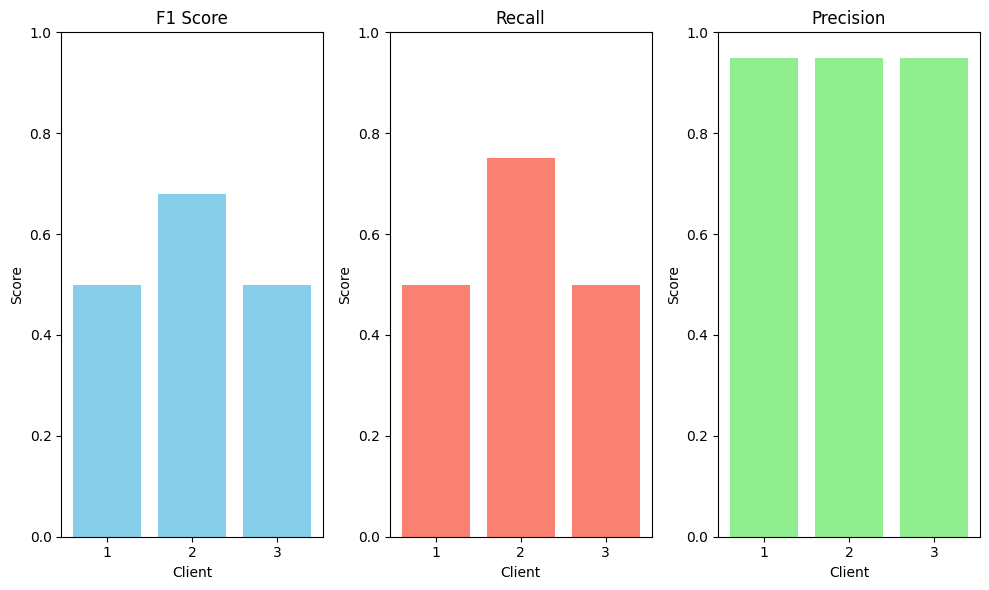

In [ ]:
# Plotting
clients = range(1, len(client_models)+1)

plt.figure(figsize=(10, 6))

# F1 Score
plt.subplot(1, 3, 1)
plt.bar(clients, client_f1_scores, color='skyblue')
plt.title('F1 Score')
plt.xlabel('Client')
plt.ylabel('Score')
plt.xticks(clients)
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1

# Recall
plt.subplot(1, 3, 2)
plt.bar(clients, client_recalls, color='salmon')
plt.title('Recall')
plt.xlabel('Client')
plt.ylabel('Score')
plt.xticks(clients)
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1

# Precision
plt.subplot(1, 3, 3)
plt.bar(clients, client_precisions, color='lightgreen')
plt.title('Precision')
plt.xlabel('Client')
plt.ylabel('Score')
plt.xticks(clients)
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1

plt.tight_layout()
plt.show()


**Accuracy and Loss**

In [ ]:
# Initialize a list to store evaluation results for each client model
client_evaluations = []

# Evaluate each client model
for client_model, client_df in zip(client_models, client_dfs):
    # Separate features and target variable for evaluation
    X_eval = client_df.drop(columns=['Class'])
    y_eval = client_df['Class']

    # Evaluate the client model
    evaluation = client_model.evaluate(X_eval, y_eval)

    # Append evaluation results to the list
    client_evaluations.append(evaluation)

# Print evaluation results for each client model
for i, evaluation in enumerate(client_evaluations):
    print(f"Client {i+1} Model Evaluation:")
    print("Loss:", evaluation[0])
    print("Accuracy:", evaluation[1])
    print()  # Print an empty line for clarity

2967/2967 [==============================] - 5s 2ms/step - loss: 0.8247 - accuracy: 0.9983
Client 1 Model Evaluation:
Loss: 2.8754773139953613
Accuracy: 0.9982408881187439

Client 2 Model Evaluation:
Loss: 0.020295031368732452
Accuracy: 0.9987465143203735

Client 3 Model Evaluation:
Loss: 0.8246716260910034
Accuracy: 0.9983146786689758



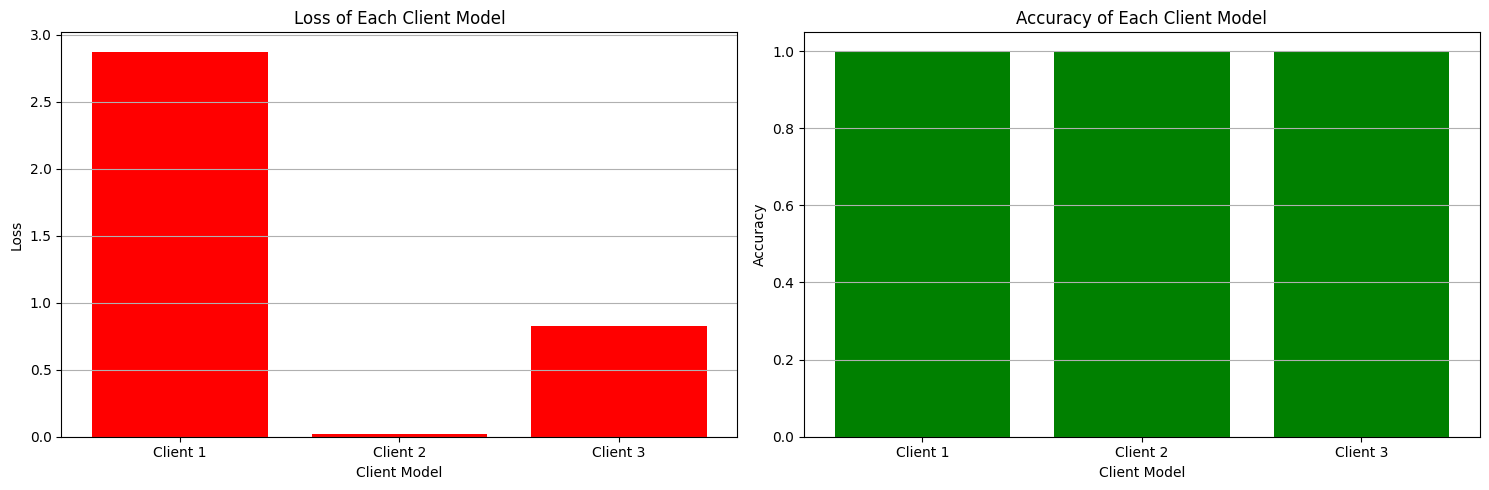

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store evaluation results for each client model
loss_values = []
accuracy_values = []

# Extract evaluation metrics for each client
for evaluation in client_evaluations:
    # Extract loss and accuracy values from the evaluation tuple
    loss_values.append(evaluation[0])
    accuracy_values.append(evaluation[1])

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot Loss
axs[0].bar(range(len(client_evaluations)), loss_values, color='red')
axs[0].set_xlabel('Client Model')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss of Each Client Model')
axs[0].set_xticks(range(len(client_evaluations)))
axs[0].set_xticklabels([f"Client {i+1}" for i in range(len(client_evaluations))])
axs[0].grid(axis='y')

# Plot Accuracy
axs[1].bar(range(len(client_evaluations)), accuracy_values, color='green')
axs[1].set_xlabel('Client Model')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy of Each Client Model')
axs[1].set_xticks(range(len(client_evaluations)))
axs[1].set_xticklabels([f"Client {i+1}" for i in range(len(client_evaluations))])
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()


**ROUC Curve**

2967/2967 [==============================] - 6s 2ms/step


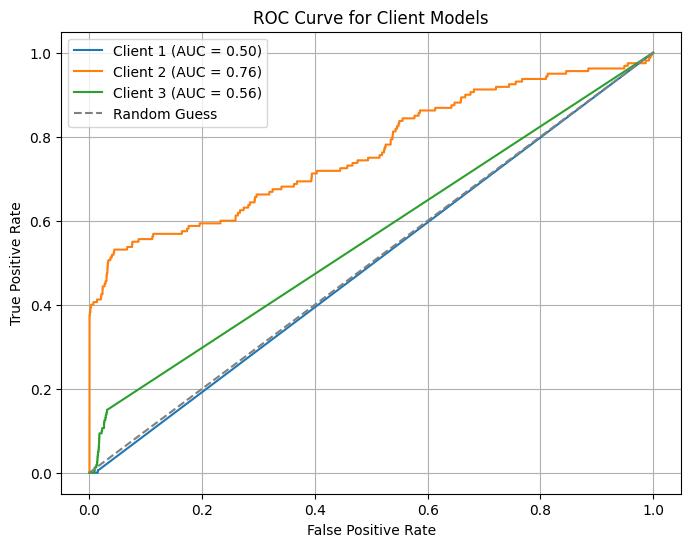

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize lists to store FPR, TPR, and AUC for each client
client_fprs = []
client_tprs = []
client_aucs = []

# Compute ROC curve and AUC for each client model
for i, client_model in enumerate(client_models):
    y_pred_prob = client_model.predict(X)  # Get predicted probabilities
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Append FPR, TPR, and AUC to lists
    client_fprs.append(fpr)
    client_tprs.append(tpr)
    client_aucs.append(roc_auc)

# Plot ROC curves for all client models
plt.figure(figsize=(8, 6))
for i in range(len(client_models)):
    plt.plot(client_fprs[i], client_tprs[i], label=f'Client {i+1} (AUC = {client_aucs[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Client Models')
plt.legend()
plt.grid()
plt.show()


# **Aggregating Client Gradients for Global Model Update**

In [ ]:
import numpy as np

# Assuming 'client_models' contains the trained TensorFlow models for each client as created in the previous step

# Initialize an empty list to hold the gradients computed by each client
client_gradients = []

# Compute gradients for each client
for client_model in client_models:
    # Define a dummy input for the model
    dummy_input = tf.convert_to_tensor(np.zeros((1, 30)), dtype=tf.float32)

    # Compute gradients using GradientTape
    with tf.GradientTape() as tape:
        predictions = client_model(dummy_input, training=True)  # Assuming the model is callable with input
    gradients = tape.gradient(predictions, client_model.trainable_variables)

    client_gradients.append(gradients)

# Aggregate the gradients from all clients to update the global model
global_gradients = [tf.reduce_mean([client_gradients[i][j] for i in range(len(client_models))], axis=0)
                    for j in range(len(client_gradients[0]))]

# Update the global model parameters using the aggregated gradients (e.g., using gradient descent)
optimizer = tf.keras.optimizers.legacy.Adam()  # Use the legacy optimizer

# Iterate over layers of the global model and apply gradients
for grad, var in zip(global_gradients, global_model.trainable_variables):
    optimizer.apply_gradients([(grad, var)])

# After updating the global model, distribute the updated global model back to the clients for further training iterations.


# **Distributing Updated Global Model to Clients for Iterative Training**

In [ ]:
# After updating the global model, distribute the updated global model back to the clients for further training iterations.
for client_model in client_models:
    # Copy the updated global model weights to the client model
    client_model.set_weights(global_model.get_weights())

# Now the updated global model has been distributed to all clients for further training iterations.

# **Training Client Models with Updated Global Model Weights**

In [ ]:
# Train each client model with the updated global model weights
for client_model, client_df in zip(client_models, client_dfs):
    # Separate features and target variable
    X = client_df.drop(columns=['Class'])
    y = client_df['Class']

    # Compile the client model with the same optimizer and loss as the global model
    client_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

    # Train the client model with the updated global model weights
    client_model.fit(X, y, epochs=10, batch_size=32)  # Adjust epochs and batch_size as needed

# After training the client models with the updated global model weights, repeat the process of computing gradients, updating the global model, and distributing the updated global model back to the clients for further training iterations.

Epoch 1/10
2967/2967 [==============================] - 7s 2ms/step - loss: 17.8614 - accuracy: 0.9961
Epoch 2/10
2967/2967 [==============================] - 7s 2ms/step - loss: 13.2522 - accuracy: 0.9960
Epoch 3/10
2967/2967 [==============================] - 5s 2ms/step - loss: 9.5759 - accuracy: 0.9960
Epoch 4/10
2967/2967 [==============================] - 7s 2ms/step - loss: 5.7573 - accuracy: 0.9964
Epoch 5/10
2967/2967 [==============================] - 5s 2ms/step - loss: 3.5096 - accuracy: 0.9960
Epoch 6/10
2967/2967 [==============================] - 6s 2ms/step - loss: 3.5249 - accuracy: 0.9959
Epoch 7/10
2967/2967 [==============================] - 7s 2ms/step - loss: 2.1401 - accuracy: 0.9962
Epoch 8/10
2967/2967 [==============================] - 5s 2ms/step - loss: 1.1472 - accuracy: 0.9966
Epoch 9/10
2967/2967 [==============================] - 7s 2ms/step - loss: 1.4018 - accuracy: 0.9957
Epoch 10/10
2967/2967 [==============================] - 5s 2ms/step - loss: 1.2

# **Model Evaluation**

**F1 score, Recall And Precision**

In [ ]:
from sklearn.metrics import classification_report

# Initialize a list to store evaluation results for each client model
client_evaluations = []

# Evaluate each client model
for client_model, client_df in zip(client_models, client_dfs):
    # Separate features and target variable for evaluation
    X_eval = client_df.drop(columns=['Class'])
    y_eval = client_df['Class']

    # Predict classes using the client model
    y_pred = client_model.predict(X_eval)
    y_pred = (y_pred > 0.5).astype(int)  # Threshold probabilities to get classes

    # Compute evaluation metrics
    evaluation = classification_report(y_eval, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

    # Append evaluation results to the list
    client_evaluations.append(evaluation)

# Print evaluation results for each client model
for i, evaluation in enumerate(client_evaluations):
    print(f"Client {i+1} Model Evaluation:")
    print("F1 Score:", evaluation['weighted avg']['f1-score'])
    print("Recall:", evaluation['weighted avg']['recall'])
    print("Precision:", evaluation['weighted avg']['precision'])
    # Print other metrics as needed
    print()  # Print an empty line for clarity


2967/2967 [==============================] - 4s 1ms/step
Client 1 Model Evaluation:
F1 Score: 0.9975526694187865
Recall: 0.9983041028071838
Precision: 0.9979761202510529

Client 2 Model Evaluation:
F1 Score: 0.9977077887851986
Recall: 0.9983357033759941
Precision: 0.9978178028552253

Client 3 Model Evaluation:
F1 Score: 0.9979304052475624
Recall: 0.9985148045545994
Precision: 0.9985170108016527



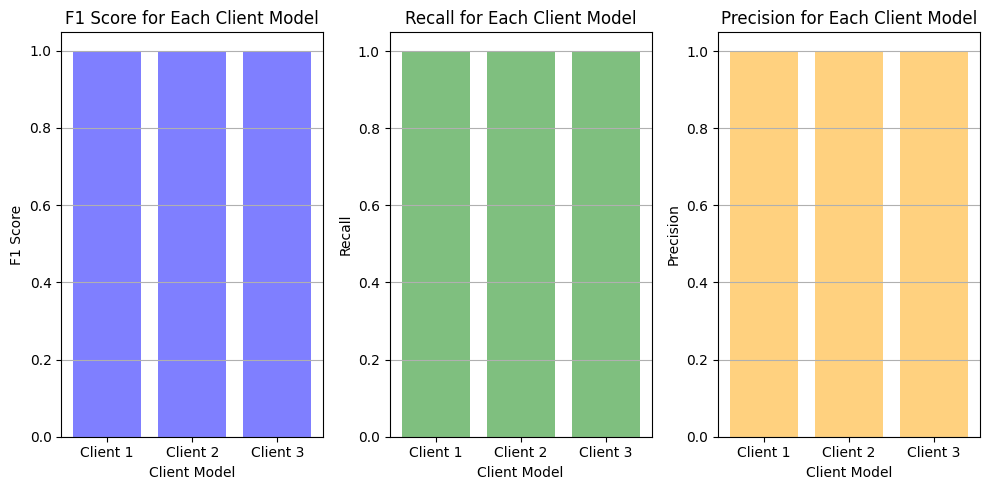

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store evaluation metrics for each client model
f1_scores = []
recalls = []
precisions = []

# Extract evaluation metrics for each client model
for evaluation in client_evaluations:
    f1_scores.append(evaluation['weighted avg']['f1-score'])
    recalls.append(evaluation['weighted avg']['recall'])
    precisions.append(evaluation['weighted avg']['precision'])

# Create bar plots for each evaluation metric
plt.figure(figsize=(10, 5))

# Plot F1 Score
plt.subplot(1, 3, 1)
plt.bar(range(len(client_evaluations)), f1_scores, color='blue', alpha=0.5)
plt.xlabel('Client Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Client Model')
plt.xticks(range(len(client_evaluations)), [f"Client {i+1}" for i in range(len(client_evaluations))])
plt.grid(axis='y')

# Plot Recall
plt.subplot(1, 3, 2)
plt.bar(range(len(client_evaluations)), recalls, color='green', alpha=0.5)
plt.xlabel('Client Model')
plt.ylabel('Recall')
plt.title('Recall for Each Client Model')
plt.xticks(range(len(client_evaluations)), [f"Client {i+1}" for i in range(len(client_evaluations))])
plt.grid(axis='y')

# Plot Precision
plt.subplot(1, 3, 3)
plt.bar(range(len(client_evaluations)), precisions, color='orange', alpha=0.5)
plt.xlabel('Client Model')
plt.ylabel('Precision')
plt.title('Precision for Each Client Model')
plt.xticks(range(len(client_evaluations)), [f"Client {i+1}" for i in range(len(client_evaluations))])
plt.grid(axis='y')

plt.tight_layout()
plt.show()


 **Accuracy And Loss**

In [ ]:
# Initialize a list to store evaluation results for each client model
client_evaluations = []

# Evaluate each client model
for client_model, client_df in zip(client_models, client_dfs):
    # Separate features and target variable for evaluation
    X_eval = client_df.drop(columns=['Class'])
    y_eval = client_df['Class']

    # Evaluate the client model
    evaluation = client_model.evaluate(X_eval, y_eval)

    # Append evaluation results to the list
    client_evaluations.append(evaluation)

# Print evaluation results for each client model
for i, evaluation in enumerate(client_evaluations):
    print(f"Client {i+1} Model Evaluation:")
    print("Loss:", evaluation[0])
    print("Accuracy:", evaluation[1])
    print()  # Print an empty line for clarity


2967/2967 [==============================] - 5s 2ms/step - loss: 0.1881 - accuracy: 0.9985
Client 1 Model Evaluation:
Loss: 1.0599483251571655
Accuracy: 0.9983041286468506

Client 2 Model Evaluation:
Loss: 0.017772167921066284
Accuracy: 0.9983357191085815

Client 3 Model Evaluation:
Loss: 0.1880897879600525
Accuracy: 0.9985148310661316



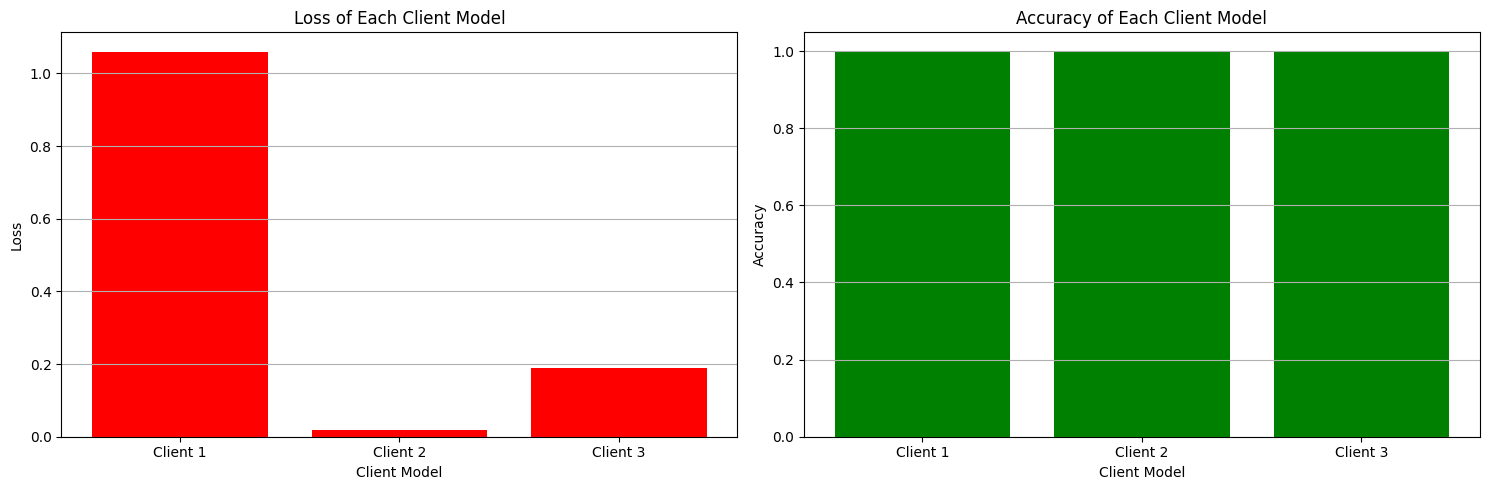

In [ ]:
# Initialize lists to store evaluation results for each client model
loss_values = []
accuracy_values = []

# Extract evaluation metrics for each client
for evaluation in client_evaluations:
    # Extract loss and accuracy values from the evaluation tuple
    loss_values.append(evaluation[0])
    accuracy_values.append(evaluation[1])

# Create bar plots for loss and accuracy
plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.bar(range(len(client_evaluations)), loss_values, color='red')
plt.xlabel('Client Model')
plt.ylabel('Loss')
plt.title('Loss of Each Client Model')
plt.xticks(range(len(client_evaluations)), [f"Client {i+1}" for i in range(len(client_evaluations))])
plt.grid(axis='y')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.bar(range(len(client_evaluations)), accuracy_values, color='green')
plt.xlabel('Client Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Client Model')
plt.xticks(range(len(client_evaluations)), [f"Client {i+1}" for i in range(len(client_evaluations))])
plt.grid(axis='y')

plt.tight_layout()
plt.show()


 **ROUC Curve**

594/594 [==============================] - 1s 2ms/step


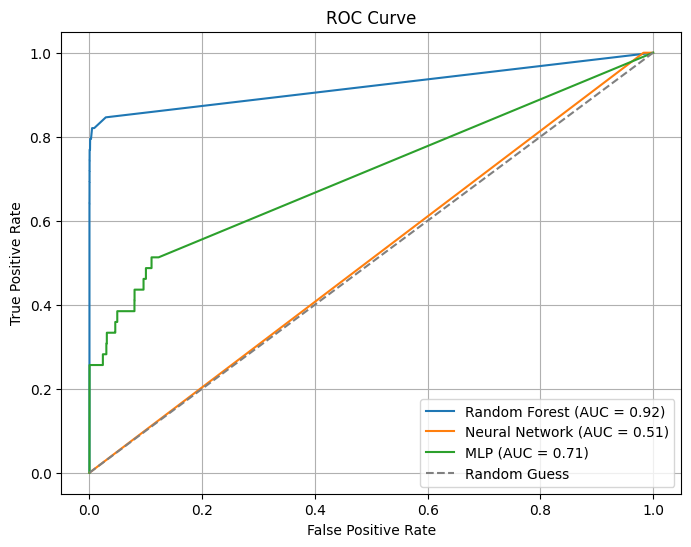

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Random Forest ROC curve
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Neural Network ROC curve
nn_probs = model.predict(X_test).ravel()
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
nn_auc = auc(nn_fpr, nn_tpr)

# MLP ROC curve
mlp_probs = mlp_classifier.predict_proba(X_test)[:, 1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
mlp_auc = auc(mlp_fpr, mlp_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, label=f'MLP (AUC = {mlp_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
